In [1]:
%matplotlib widget

In [2]:
import xtrack as xt
import xpart as xp
import xobjects as xo
import numpy as np

In [3]:
line = xt.Line.from_json('lep_sol.json')

Loading line from dict:   0%|          | 0/9667 [00:00<?, ?it/s]

Done loading line from dict.           


In [4]:

line['on_solenoids'] = 1
line['on_spin_bumps'] = 0
line['on_coupling_corrections'] = 1

line['on_sol.2'] = 'on_solenoids'
line['on_sol.4'] = 'on_solenoids'
line['on_sol.6'] = 'on_solenoids'
line['on_sol.8'] = 'on_solenoids'
line['on_spin_bump.2'] = 'on_spin_bumps'
line['on_spin_bump.4'] = 'on_spin_bumps'
line['on_spin_bump.6'] = 'on_spin_bumps'
line['on_spin_bump.8'] = 'on_spin_bumps'
line['on_coupl_sol.2'] = 'on_coupling_corrections * on_solenoids'
line['on_coupl_sol.4'] = 'on_coupling_corrections * on_solenoids'
line['on_coupl_sol.6'] = 'on_coupling_corrections * on_solenoids'
line['on_coupl_sol.8'] = 'on_coupling_corrections * on_solenoids'
line['on_coupl_sol_bump.2'] = 'on_coupling_corrections * on_spin_bumps'
line['on_coupl_sol_bump.4'] = 'on_coupling_corrections * on_spin_bumps'
line['on_coupl_sol_bump.6'] = 'on_coupling_corrections * on_spin_bumps'
line['on_coupl_sol_bump.8'] = 'on_coupling_corrections * on_spin_bumps'



In [5]:
tw = line.twiss4d(spin=True)

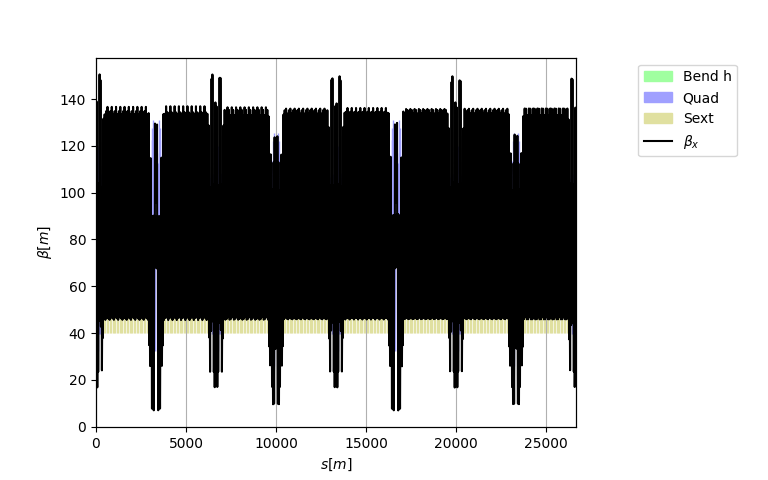

In [6]:
tw.plot('betx')

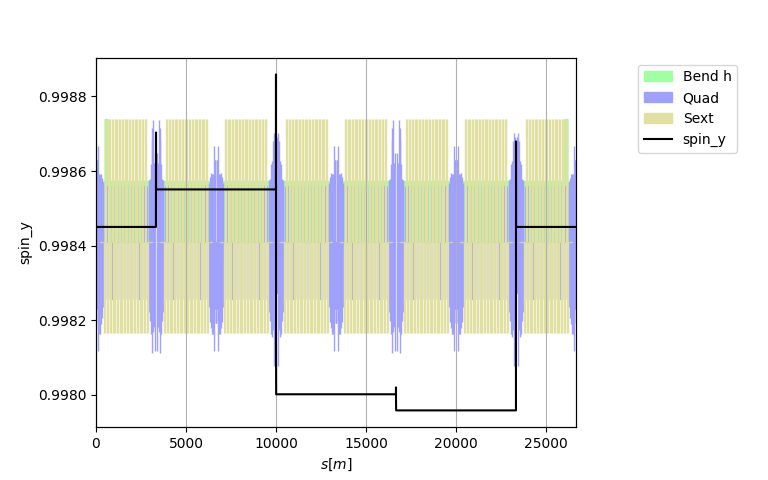

In [7]:
tw.plot('spin_y')

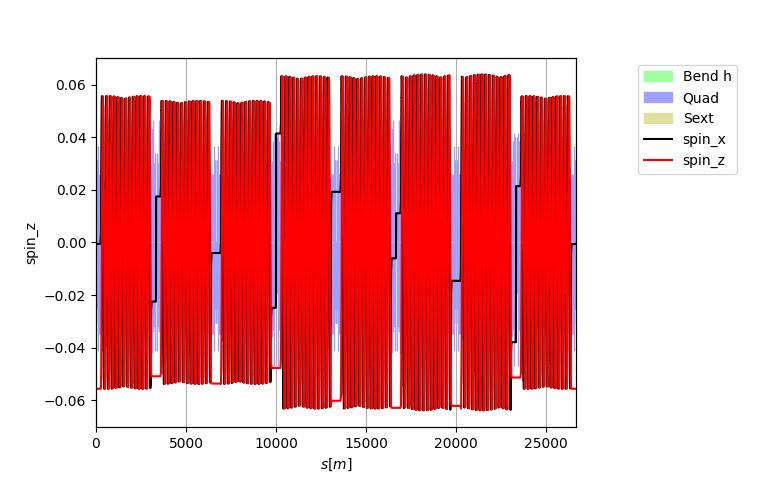

In [8]:
tw.plot('spin_x spin_z')

In [9]:
tw = line.twiss4d(spin=True, polarization=True)

In [10]:
tw.spin_polarization_eq

np.float64(0.018600746214635464)

In [11]:
tw4 = tw.rows['ip4':'ip5']

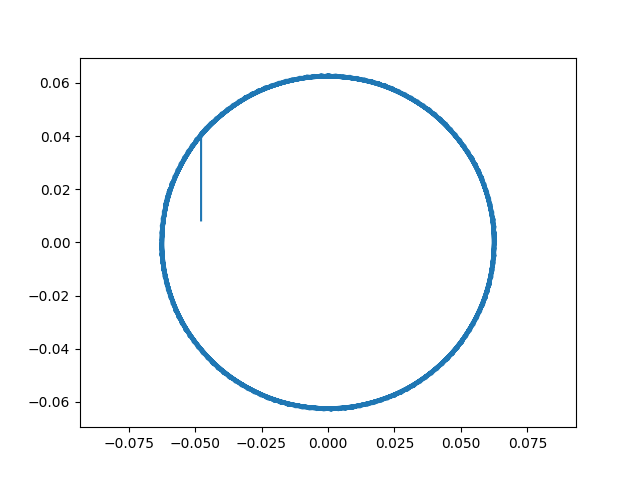

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.axis('equal')
plt.plot(tw4.spin_z, tw4.spin_x)